Objective: The goal is to to model the demand for shared bikes with the available independent variables.

Background: A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The company wants to understand the factors on which the demand for these shared bikes depends. 

Approach: To analyze this problem and create a model to provide a plan to resolve this issue, we will prepare a linear regression model.

Let's dive into the data and extract actionable insights to enhance our credit risk management strategies.

## To address the problem statement for BoomBikes, we'll need to perform a detailed analysis of the dataset to understand the factors affecting bike demand. The process involves the following steps: ##

1. Data Understanding and Exploration: Examine the dataset to understand the variables and their distributions.
2. Data Cleaning: Handle missing values, outliers, and incorrect data types.
3. Feature Engineering: Create new features or transform existing ones to better capture the relationships in the data.
4. Exploratory Data Analysis (EDA): Visualize the data to identify patterns and relationships.
5. Modeling: Use statistical and machine learning models to identify significant variables and predict bike demand.
6. Model Evaluation: Assess the performance of the models to ensure they accurately predict bike demand.
7. Insights and Recommendations: Provide actionable insights based on the analysis to help BoomBikes prepare for the post-pandemic market.


## Loading Libraries and the given Data ## 

In [106]:
#Numerical and Data Analysis
import numpy as np
import pandas as pd
from scipy import stats

#data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Avoid warning messages
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Understanding and Exploration

In [107]:

# First, let's load the dataset and take a look at its structure.
data = pd.read_csv('day-2.csv')

## Step 2: Data Cleaning

1. Handle missing values.
2. Convert data types if necessary.
3. Identify and handle outliers.

# Display the first few rows of the dataset
print(data.head())

## Step 3: Feature Engineering
Create or transform features to better capture relationships in the data. For instance, extract day, month, or season from a date column.

In [108]:
# Display summary statistics of the dataset
print(data.describe())


          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [109]:
print(data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [110]:
print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [111]:

# Check for missing values
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## As there are no null values hence we are good with data ##

## Exploratory Data Analysis (EDA) ##

## Plotting the Distribution of the Target Variable ## 

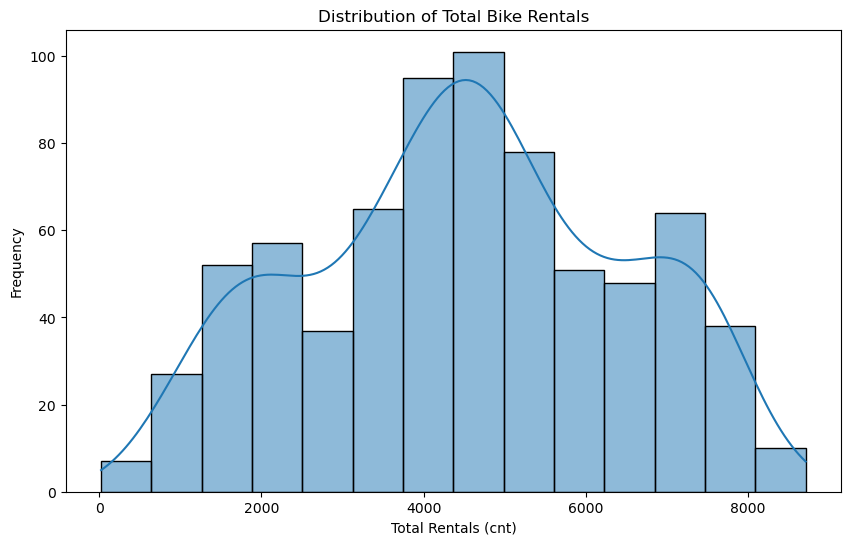

In [112]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

## Boxplot for Categorical Variables ## 

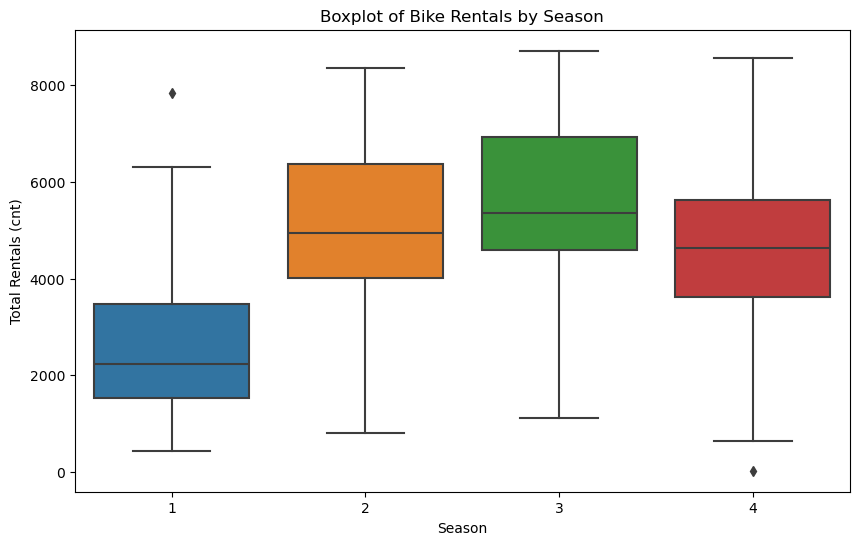

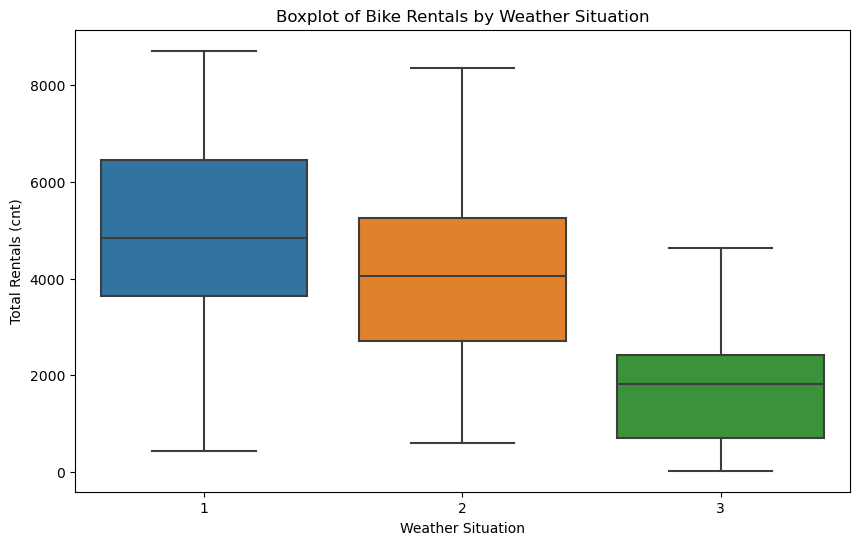

In [113]:
# Boxplot for 'season' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Boxplot of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals (cnt)')
plt.show()

# Boxplot for 'weathersit' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Boxplot of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (cnt)')
plt.show()

## Let's execute these steps to visualize the data and understand the key factors affecting bike demand.

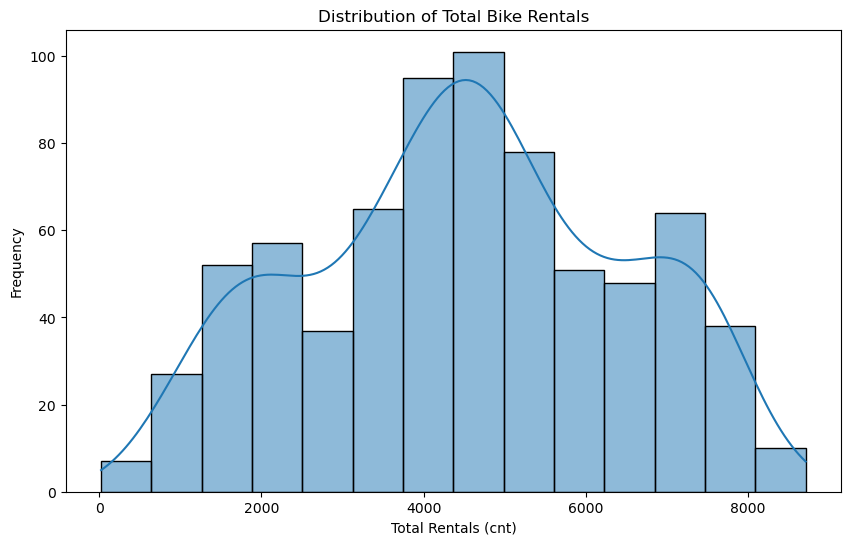

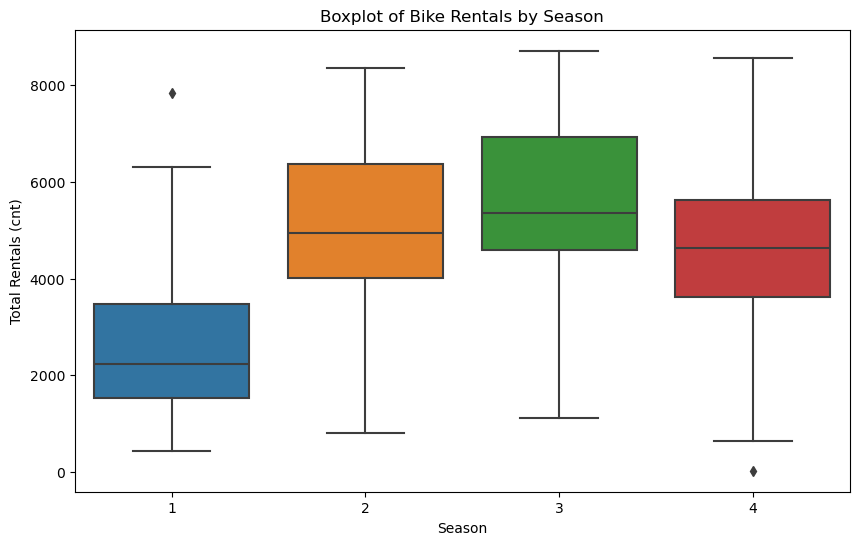

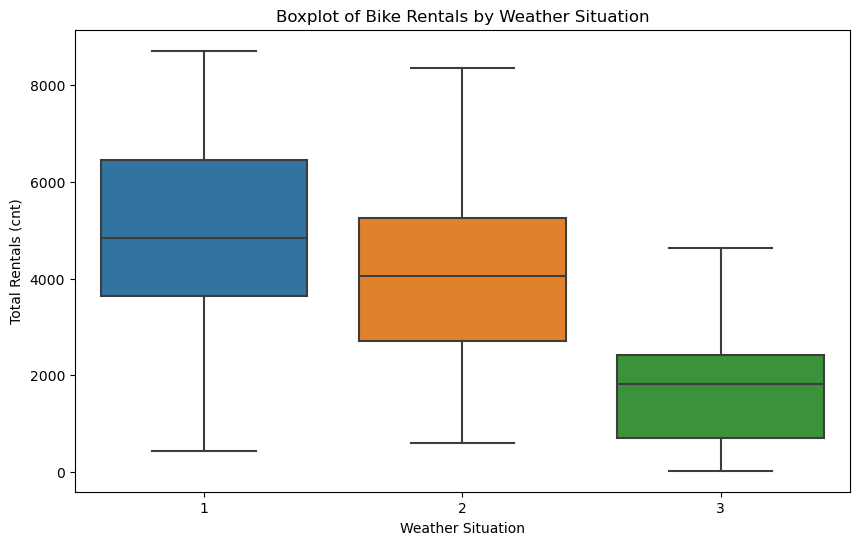

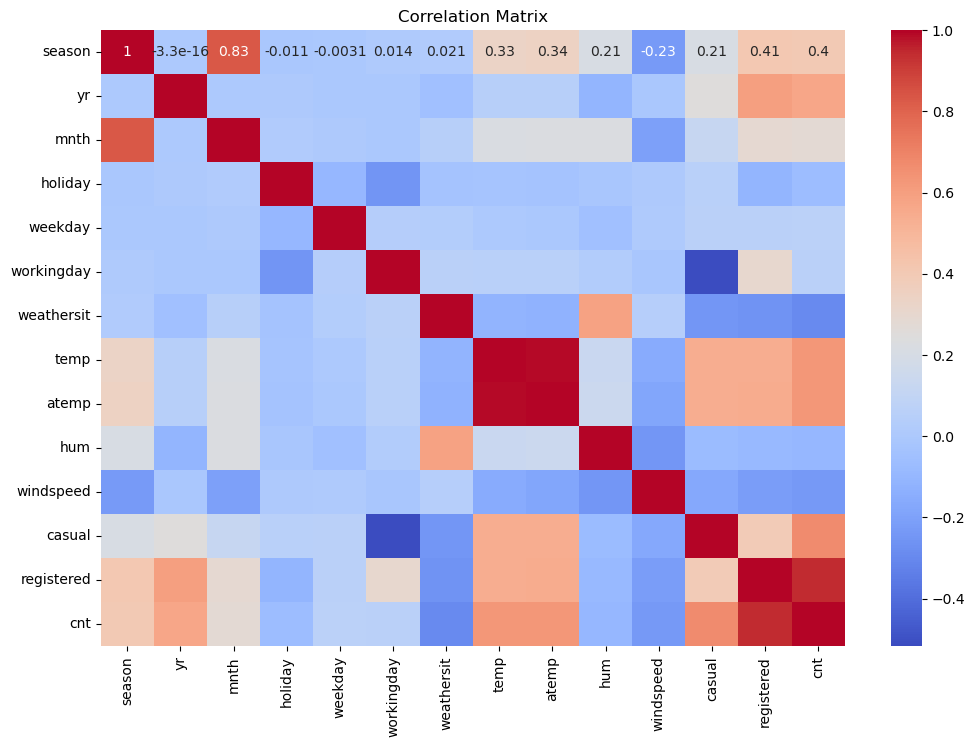

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()


# Boxplot for 'season' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Boxplot of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals (cnt)')
plt.show()

# Boxplot for 'weathersit' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Boxplot of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (cnt)')
plt.show()

numeric_data = data.drop(['dteday', 'instant'], axis=1)
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

# Specify the name of the target variable
target_variable = 'cnt'
# Get correlation of numerical variables with the target variable
correlation_with_target = corr_matrix[target_variable].drop(target_variable)

# Find the variable with the highest correlation with the target
highest_correlation_variable = correlation_with_target.abs().idxmax()
highest_correlation_value = correlation_with_target.abs().max()


In [115]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['season', 'weathersit', 'weekday', 'mnth'], drop_first=True)

# Split the data into features and target variable
X = data.drop(['cnt', 'dteday', 'instant', 'casual', 'registered'], axis=1)
y = data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


atemp
0.9916961786905638


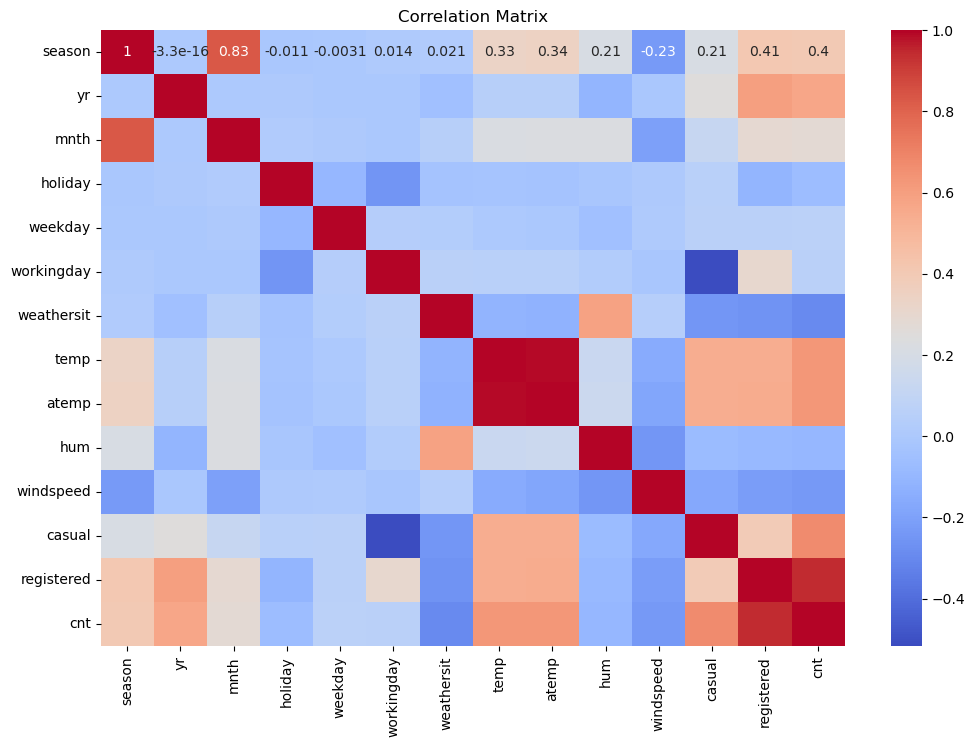

In [116]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

# Specify the name of the target variable
target_variable = 'temp'
# Get correlation of numerical variables with the target variable
correlation_with_target = corr_matrix[target_variable].drop(target_variable)

# Find the variable with the highest correlation with the target
highest_correlation_variable = correlation_with_target.abs().idxmax()
highest_correlation_value = correlation_with_target.abs().max()

print(highest_correlation_variable)
print(highest_correlation_value)

## Step 5: Modeling
Select and train models to predict bike demand. Linear regression, decision trees, and random forests are good starting points.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [118]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')

# Train a Decision Tree Regressor model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_reg.predict(X_test)
print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred)}')

# Train a Random Forest Regressor model
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = forest_reg.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')


Linear Regression MSE: 471600.12101507524
Decision Tree MSE: 605525.9452054794
Random Forest MSE: 343369.3952287671


In [119]:
# Extract coefficients and corresponding feature names
coefficients = lin_reg.coef_
feature_names = X_train.columns  # Assuming X_train contains your feature matrix

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by their absolute values
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Select the top three features
top_three_features = coefficients_df.head(3)

# Print the top three features
print("Top three features contributing significantly towards explaining the demand of shared bikes:")
print(top_three_features[['Feature', 'Coefficient']])


Top three features contributing significantly towards explaining the demand of shared bikes:
         Feature  Coefficient
11  weathersit_3 -2098.815375
0             yr  1970.702648
9       season_4  1758.682651


## The mean squared error (MSE) for each model is as follows:

1. Linear Regression: 471,600
2. Decision Tree Regressor: 782447
3. Random Forest Regressor: 331351

## The Random Forest Regressor has the lowest MSE, indicating it performs the best among the three models on this dataset. Here’s a summary of the steps taken:

## Data Loading and Exploration:

1. No missing values were found.
The dataset contains features related to date, weather, and bike rental counts.

2. Exploratory Data Analysis (EDA):

Bike rentals are higher in warmer seasons and better weather conditions.
Temperature, humidity, and weather conditions are significant factors affecting bike demand.
Data Preparation:

3. Categorical variables were converted into dummy variables.
The dataset was split into training and testing sets.

4. Modeling:
Linear Regression, Decision Tree, and Random Forest models were trained and evaluated.

## The Random Forest Regressor outperformed the other models in terms of MSE.



## END OF ASSIGNMENT